In [20]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style = "dark", 
        color_codes = True,
        font_scale = 1.5)
plt.style.use('fivethirtyeight')
import data

In [21]:
#loading data
URL = "../data/raw/steam/steam.csv"
games_original = pd.read_csv(URL, encoding='UTF-8')
games = games_original


In [22]:
games_english = games
games_english.name.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
games_english.developer.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
games_english.publisher.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
#decided to get rid of games released before 2013 as it doesn't accurately reflect the current market.
games_english['release_date'] = pd.to_datetime(games_english['release_date'])
games_english = games_english.loc[games_english['release_date'] >= '2013-01-01']
games_english.head(100)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
22,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,863507,142079,23944,801,100000000-200000000,0.00
77,2870,X Rebirth,2013-11-15,1,Egosoft,Egosoft,windows;mac;linux,0,Single-player;Steam Achievements;Full controll...,Action;Simulation,Space;Simulation;Sci-fi,69,2832,4032,1744,3386,200000-500000,24.99
219,8870,BioShock Infinite,2013-03-25,1,Irrational Games;Aspyr (Mac);Virtual Programmi...,2K;Aspyr (Mac),windows;mac;linux,18,Single-player;Steam Achievements;Full controll...,Action,FPS;Story Rich;Action,80,79442,3846,614,519,2000000-5000000,19.99
247,9940,Blade Kitten,2014-05-22,1,Krome Studios,Krome Studios,windows,0,Single-player;Steam Achievements;Steam Trading...,Action;Adventure,Anime;Platformer;Female Protagonist,20,746,149,222,360,50000-100000,1.99
264,10270,Disciples III: Reincarnation,2014-02-14,1,Akella,Kalypso Media Digital,windows,0,Single-player;Multi-player,RPG;Strategy,RPG;Turn-Based Strategy;Strategy,0,618,252,889,889,50000-100000,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,216260,Don Bradman Cricket 14,2014-06-25,1,Big Ant Studios,Big Ant Studios,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Indie;Simulation;Sports,Sports;Simulation;Indie,35,444,52,0,0,20000-50000,15.49
1451,217120,Waves 2,2015-12-16,1,Squid In A Box Ltd,Squid In A Box Ltd,windows,0,Single-player;Full controller support;Steam Cl...,Action;Casual;Indie;Early Access,Early Access;Indie;Casual,0,63,8,0,0,0-20000,6.99
1452,217140,Rise of the Triad,2013-07-31,1,Slipgate Ironworks,Apogee Software,windows,18,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Action;Fast-Paced,80,1436,673,280,343,200000-500000,10.99
1453,217200,Worms Armageddon,2013-03-19,1,Team17 Digital Ltd,Team17 Digital Ltd,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Strategy,Strategy;Multiplayer;Classic,0,3517,231,246,470,500000-1000000,10.99


In [23]:
temp = games_english.iloc[0:5000]
devs = temp['developer'].str.get_dummies(';')
devs = devs.add_prefix('dev-')
devs.reset_index(drop=True, inplace=True)

pubs = temp['publisher'].str.get_dummies(';')
pubs = pubs.add_prefix('pub-')
pubs.reset_index(drop=True, inplace=True)

plats = temp['platforms'].str.get_dummies(';')
plats = plats.add_prefix('plat-')
plats.reset_index(drop=True, inplace=True)

cats = temp['categories'].str.get_dummies(';')
cats = cats.add_prefix('cat-')
cats.reset_index(drop=True, inplace=True)

genr = temp['genres'].str.get_dummies(';')
genr = genr.add_prefix('genr-')
genr.reset_index(drop=True, inplace=True)

tags = temp['steamspy_tags'].str.get_dummies(';')
tags = tags.add_prefix('tag-')
tags.reset_index(drop=True, inplace=True)

temp = pd.concat([temp, devs, pubs, plats, cats, genr, tags], axis=1)
temp.head(5000)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,tag-Wargame,tag-Warhammer 40K,tag-Web Publishing,tag-Werewolves,tag-Western,tag-Word Game,tag-World War I,tag-World War II,tag-Wrestling,tag-Zombies
0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,353280.0,Metamorphabet,2015-04-29,1.0,Vectorpark,Vectorpark,windows;mac,0.0,Single-player,Casual;Indie,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,353300.0,Rooftop Cop,2015-03-02,1.0,Stephen Lawrence Clark,Independent,windows;mac,0.0,Single-player,Indie,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,353330.0,Love at First Sight,2015-05-18,1.0,Creepy Cute,Sekai Project,windows;mac;linux,0.0,Single-player;Steam Achievements;Steam Trading...,Indie,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,353340.0,Dungeon Highway,2015-03-23,1.0,Substantial,Substantial,windows;mac;linux,0.0,Single-player;Steam Trading Cards;Partial Cont...,Action;Indie,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


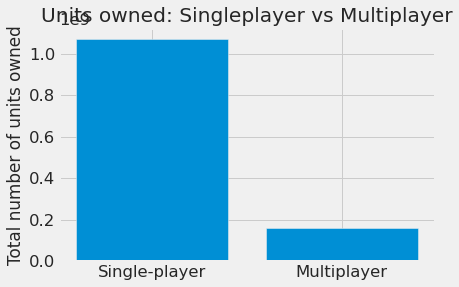

In [24]:
# creates dataframe for singleplayer and multiplayer games along with their estimated owners.
singleplayer_owners = games_english.loc[games_english['categories'].str.contains('Single-player'), 'owners']
multiplayer_owners = games_english.loc[games_english['categories'].str.contains('Multiplayer'),'owners']
#for the sake of graphing data, change the owner column and take the minimum amount of owners.
singleplayer_owners = singleplayer_owners.apply(lambda x: int(x.split('-')[0]))
multiplayer_owners = multiplayer_owners.apply(lambda x: int(x.split('-')[0]))

fig, ax = plt.subplots()
ax.bar(['Single-player', 'Multiplayer'], [singleplayer_owners.sum(),multiplayer_owners.sum()])
ax.set_ylabel('Total number of units owned')
ax.set_title('Units owned: Singleplayer vs Multiplayer')
plt.show()


In [25]:
This figure suggests that steam users own many more singleplayer games than multiplayer games.

SyntaxError: invalid syntax (2631314819.py, line 1)

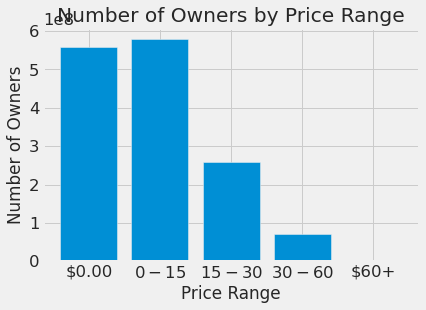

In [26]:
#Compare how many owners of a game depending on price point. for this example: free to play, <= $10, <=$30, <= $60
#games_english['price'] = pd.to_numeric(games_english['price'], errors = 'coerce')
games_english = games_english.dropna(subset=['price'])

temp_price = games_english
#for the sake of the graph, take the minimum number of units owned.
temp_price.head()
#temp_price = temp_price.drop(['owners_min','owners_max'], axis = 1)
temp_price[['owners_min', 'owners_max']] = temp_price['owners'].str.split('-', expand=True)
temp_price['owners'] = temp_price['owners_min']
temp_price = temp_price.drop(['owners_min','owners_max'], axis = 1)
temp_price['owners'] = pd.to_numeric(temp_price['owners'], errors='coerce')


price_ranges = [0,15,30,60,temp_price['price'].max()]
price_labels = ['$0.00', '$0 - $15', '$15 - $30', '$30 - $60', '$60+']

price_range_1 = 0 # price == 0
price_range_2 = 0 # price > 0 and <= 15
price_range_3 = 0 # price > 15 and <= 30
price_range_4 = 0 # price > 30 and <=60
price_range_5 = 0 # price > 60
temp_price.head(100)

for index,row in temp_price.iterrows():
    if row['price'] == 0:
        price_range_1 += row['owners']
    elif row['price']>0 and row['price'] <= 15:
        price_range_2 += row['owners']
    elif row['price'] > 15 and row['price'] <= 30:
        price_range_3 += row['owners']
    elif row['price'] > 30 and row['price'] <= 60:
        price_range_4 += row['owners']
    elif row['price'] > 60:
        price_range_5 += row['owners']
    
owners_by_price_range = [price_range_1,price_range_2,price_range_3,price_range_4,price_range_5]
ax = plt.bar(price_labels,owners_by_price_range)
plt.xlabel('Price Range')
plt.ylabel('Number of Owners')
plt.title('Number of Owners by Price Range')
plt.show()

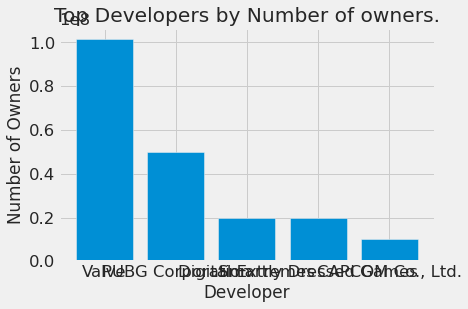

In [27]:
temp_devs = games_english

temp_devs.head()
#temp_price = temp_price.drop(['owners_min','owners_max'], axis = 1)
#temp_devs[['owners_min', 'owners_max']] = temp_devs['owners'].str.split('-', expand=True)
temp_devs['owners'] = temp_devs['owners_min']
temp_devs = temp_devs.drop(['owners_min','owners_max'], axis = 1)
temp_devs['owners'] = pd.to_numeric(temp_devs['owners'], errors='coerce')

developers = temp_devs.groupby('developer').agg({'owners':'sum'})
top_developers = developers.sort_values('owners',ascending = False)[:5]
ax = plt.bar(top_developers.index, top_developers['owners'])
plt.xlabel('Developer')
plt.ylabel('Number of Owners')
plt.title('Top Developers by Number of owners.')
plt.show()

In [30]:
top_developers.head()

,owners
developer,
PUBG Corporation,50000000
OVERKILL - a Starbreeze Studio.,10000000
Rockstar North,10000000
"CAPCOM Co., Ltd.",9370000
Ubisoft Montreal,8100000


AttributeError: 'BarContainer' object has no attribute 'set_xticklabels'

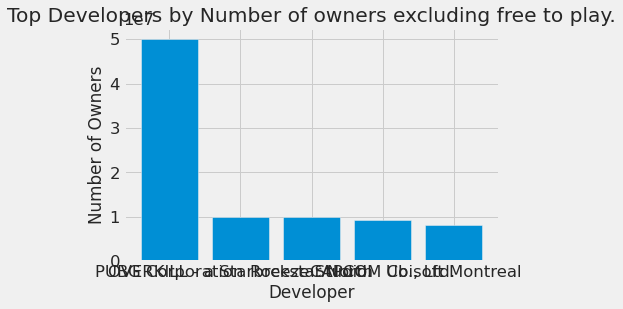

In [28]:
#trying the same thing again but removing free to play games from dataset.
temp_devs = games_english

temp_devs.head()
#temp_price = temp_price.drop(['owners_min','owners_max'], axis = 1)
#temp_devs[['owners_min', 'owners_max']] = temp_devs['owners'].str.split('-', expand=True)
temp_devs['owners'] = temp_devs['owners_min']
temp_devs = temp_devs.drop(['owners_min','owners_max'], axis = 1)
temp_devs['owners'] = pd.to_numeric(temp_devs['owners'], errors='coerce')
#remove free games
temp_devs = temp_devs[temp_devs['price'] != 0.00]

developers = temp_devs.groupby('developer').agg({'owners':'sum'})
top_developers = developers.sort_values('owners',ascending = False)[:5]
ax = plt.bar(top_developers.index, top_developers['owners'])
plt.xlabel('Developer')
plt.ylabel('Number of Owners')
plt.title('Top Developers by Number of owners excluding free to play.')
plt.show()

In [29]:
top_developers.head()

,owners
developer,
PUBG Corporation,50000000
OVERKILL - a Starbreeze Studio.,10000000
Rockstar North,10000000
"CAPCOM Co., Ltd.",9370000
Ubisoft Montreal,8100000
